Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
import joblib,os 
print("libraries imported😊")

libraries imported😊


Data Preparation


In [51]:
train_df = pd.read_csv("survey.csv")

In [52]:
train_df.shape

(1259, 27)

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [54]:
train_df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Data cleaning

In [55]:
train_df.drop(['comments','state','Timestamp','Country','supervisor','phys_health_interview'],axis=1,inplace=True)

In [56]:
train_df['self_employed'].fillna('No',inplace=True)

In [57]:
train_df['work_interfere'].fillna('N/A',inplace=True)

In [58]:
train_df['family_history'].fillna('No',inplace=True)

In [59]:
train_df['Gender'].value_counts().keys()

Index(['Male', 'male', 'Female', 'M', 'female', 'F', 'm', 'f', 'Make', 'Male ',
       'Woman', 'Cis Male', 'Man', 'Female (trans)', 'Female ', 'Trans woman',
       'msle', 'male leaning androgynous', 'Neuter', 'cis male', 'queer',
       'Female (cis)', 'Mail', 'cis-female/femme', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man', 'Guy (-ish) ^_^', 'Enby', 'Agender',
       'Androgyne', 'Male-ish', 'maile', 'Trans-female', 'Cis Female',
       'something kinda male?', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Nah', 'All', 'fluid', 'Genderqueer',
       'ostensibly male, unsure what that really means'],
      dtype='object', name='Gender')

In [60]:
train_df.drop(train_df[(train_df['Age']>60) | (train_df['Age']<18)].index,inplace=True)

In [61]:
train_df['Gender'].replace(['Male', 'male', 'M', 'm', 'Make', 'Cis Man ',
       'Cis Male', 'Man','Male (CIS)','Mal','Male-ish','Malr','cis male','Mail','Mal','maile','msle','Cis Man','Male','Male '],'Male',inplace=True)
train_df['Gender'].replace(['Female','female','f','F','Cis Female','Femake','woman','cis-female/femme','Female (cis)','Woman','Femail','femail','Female '],'Female',inplace=True)
train_df['Gender'].replace(['Female (trans)','Trans woman','Neuter','queer','A little about you' ,'p','Guy (-ish) ^_^','Enby','Agender','Androgyne', 'Trans-female', 'something kinda male?', 'queer/she/they','non-binary','Nah','All','fluid','Genderqueer','ostensibly male, unsure what that really means','male leaning androgynous'],'Non-binary',inplace=True)

Data Visualization

Text(0.5, 0, 'Age')

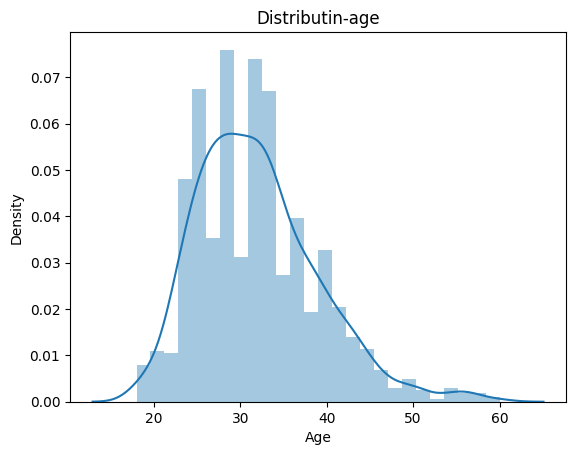

In [62]:
sns.distplot(train_df['Age'])
plt.title("Distributin-age")
plt.xlabel('Age')

In [63]:
train_df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'mental_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

Text(0.5, 1.0, 'employment-type')

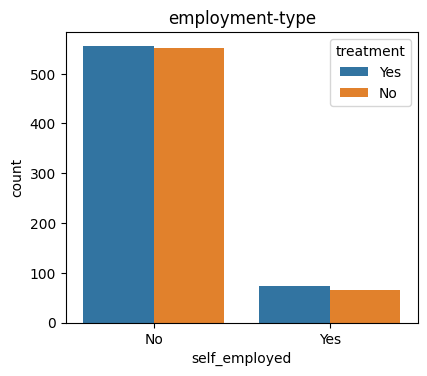

In [64]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sns.countplot(x ='self_employed' , hue='treatment',data=train_df)
plt.title('employment-type')

Text(0.5, 1.0, 'Family_history')

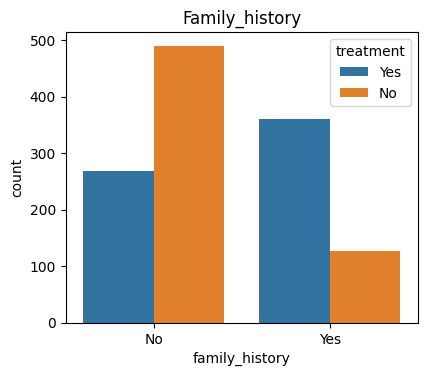

In [65]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='family_history', hue = 'treatment',data=train_df)
plt.title('Family_history')

Text(0.5, 1.0, 'work_interfere')

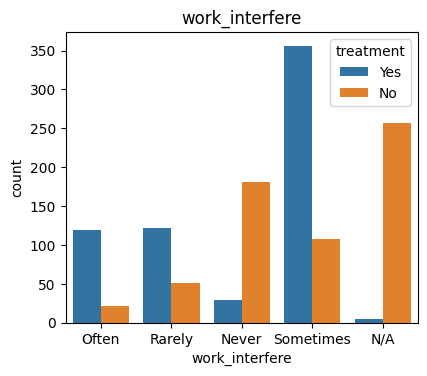

In [66]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='work_interfere', hue ='treatment',data=train_df)
plt.title('work_interfere')

Text(0.5, 1.0, 'work-type')

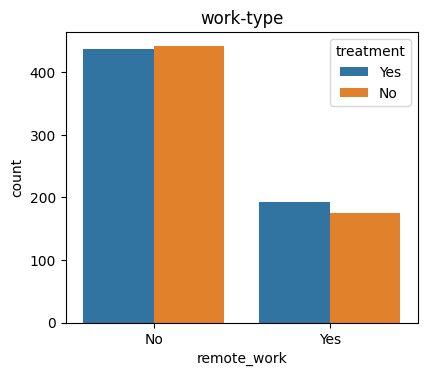

In [67]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sns.countplot(x='remote_work', hue='treatment',data=train_df)
plt.title('work-type')

Text(0.5, 1.0, 'benefits')

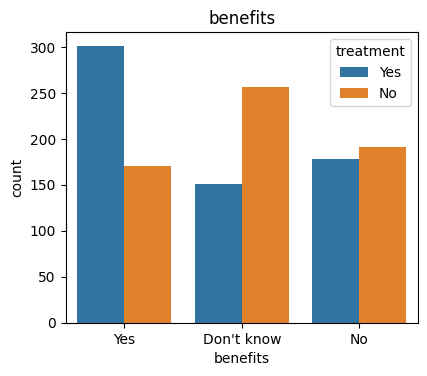

In [68]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='benefits', hue = 'treatment',data=train_df)
plt.title('benefits')

Text(0.5, 1.0, 'care_option')

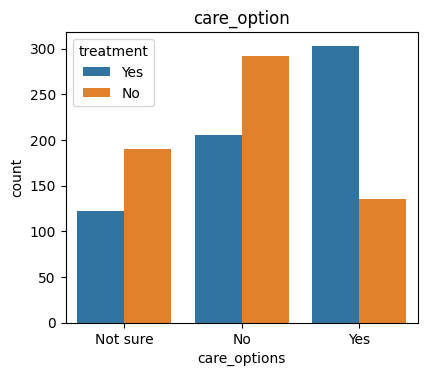

In [69]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='care_options', hue = 'treatment',data=train_df)
plt.title('care_option')

Text(0.5, 1.0, 'mental vs physical')

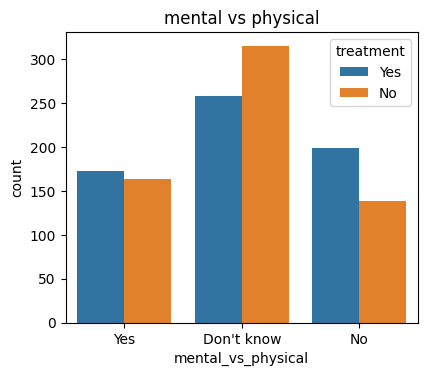

In [70]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='mental_vs_physical', hue = 'treatment',data= train_df)
plt.title('mental vs physical')

Text(0.5, 1.0, 'Wellness program')

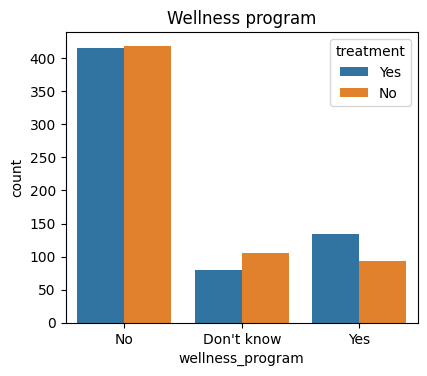

In [71]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='wellness_program', hue = 'treatment',data = train_df)
plt.title('Wellness program')

Text(0.5, 1.0, 'anoymity')

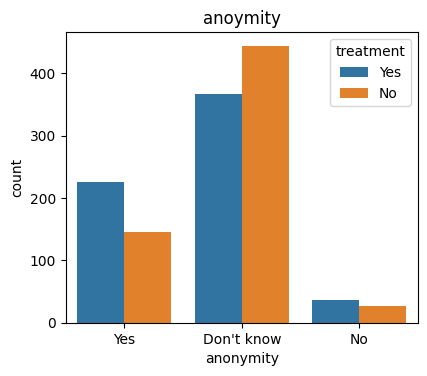

In [72]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='anonymity', hue = 'treatment',data=train_df)
plt.title('anoymity')

Text(0.5, 1.0, 'Leave')

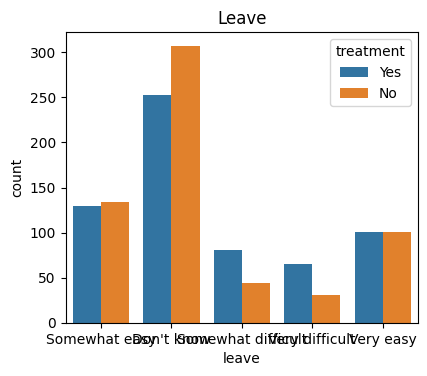

In [73]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='leave', hue = 'treatment',data=train_df)
plt.title("Leave")

Text(0.5, 1.0, 'mental_health consequences')

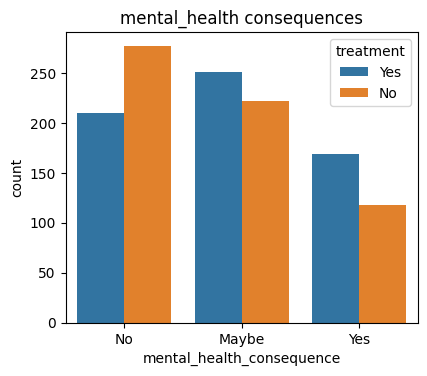

In [74]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='mental_health_consequence', hue = 'treatment',data=train_df)
plt.title('mental_health consequences')

Text(0.5, 1.0, 'physical_health consequences')

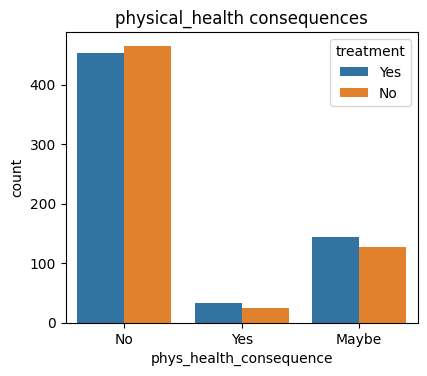

In [75]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='phys_health_consequence', hue = 'treatment',data=train_df)
plt.title('physical_health consequences')

Text(0.5, 1.0, 'discussion with workers')

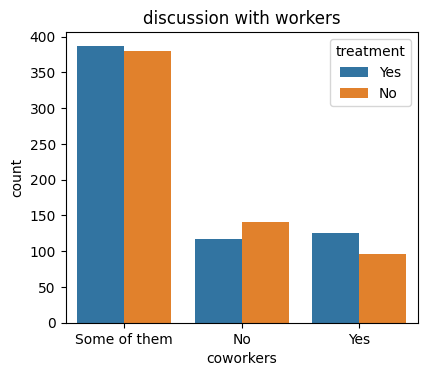

In [76]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='coworkers', hue = 'treatment',data=train_df)
plt.title('discussion with workers')

Text(0.5, 1.0, 'mental_health Discussion')

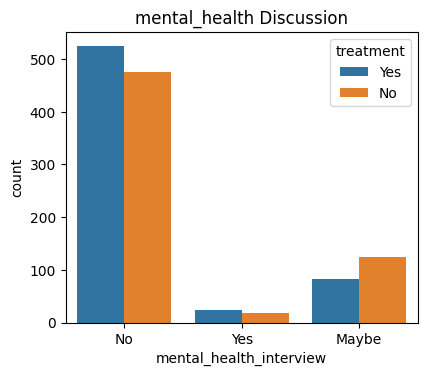

In [77]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='mental_health_interview', hue = 'treatment',data=train_df)
plt.title('mental_health Discussion')

Text(0.5, 1.0, 'consequences after Disclosure')

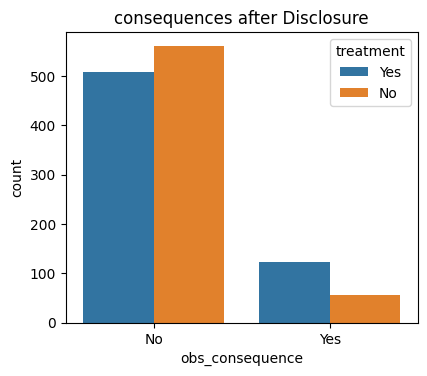

In [78]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x='obs_consequence', hue = 'treatment',data=train_df)
plt.title('consequences after Disclosure')

In [79]:
train_df.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,3,3,5,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,No,No,Don't know,Don't know,No,No,Some of them,No,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,835,639,811,560,487,918,767,1000,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
x=train_df.drop('treatment',axis=1)
y=train_df['treatment']

In [81]:
categorical=train_df.select_dtypes(include="O")
categorical

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,mental_vs_physical,obs_consequence
0,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,No,Yes,No
1,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No
2,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,No,No
3,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,Maybe,No,Yes
4,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,Male,No,No,Yes,N/A,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,No,Don't know,No
1255,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,No,Yes,No
1256,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No
1257,Female,No,No,No,N/A,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No


Label Encoding

In [82]:
train_df['treatment'].value_counts()


treatment
Yes    630
No     617
Name: count, dtype: int64

In [83]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60]
label_Gender ['Female', 'Male', 'Non-binary']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['N/A', 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Som

In [84]:
train_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,mental_vs_physical,obs_consequence
0,19,0,0,0,1,2,4,0,1,2,...,1,2,2,2,1,1,1,1,2,0
1,26,1,0,0,0,3,5,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,14,1,0,0,0,3,4,0,1,1,...,1,1,0,1,1,1,2,2,1,0
3,13,1,0,1,1,2,2,0,1,1,...,1,1,1,1,2,2,1,0,1,1
4,13,1,0,0,0,1,1,1,1,2,...,0,0,0,0,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,0,0,1,0,2,0,1,1,...,1,1,0,2,1,1,1,1,0,0
1255,14,1,0,1,1,2,2,1,1,2,...,1,1,2,1,1,1,1,1,2,0
1256,16,1,0,1,1,4,5,0,1,2,...,1,1,0,1,2,2,0,1,1,0
1257,28,0,0,0,0,0,1,1,1,1,...,1,1,0,0,2,1,0,1,1,0


Train the Model

In [85]:
x = train_df.drop('treatment' , axis=1)
y=train_df[["treatment"]]

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [87]:
## object creation
# Hyper parameter turning  ---> to obtained highest accuracy 
lgr = LogisticRegression()
rdmfc = RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [88]:
x_train.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
mental_health_interview      0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [89]:
## model train 
lgr.fit(x_train,y_train) 
rdmfc.fit(x_train,y_train) 
dtc.fit(x_train,y_train)
print('You have trained your all algorithms ')

You have trained your all algorithms 


In [90]:
x_train

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,mental_vs_physical,obs_consequence
1198,14,1,0,0,2,2,1,1,2,1,1,0,0,3,2,0,1,1,0,0
890,24,1,1,1,4,4,1,0,2,1,0,2,0,0,0,0,1,1,0,0
843,17,1,0,0,4,5,0,1,0,1,2,0,0,0,0,1,1,1,0,0
413,13,2,0,1,4,5,0,1,0,0,1,1,0,0,2,0,0,1,2,0
1233,5,1,0,0,3,4,0,1,1,2,1,1,0,0,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,15,0,0,1,4,2,1,1,1,2,1,1,0,3,2,0,1,1,1,0
415,12,1,0,1,2,4,0,1,0,0,1,0,0,2,0,1,1,1,0,0
1149,14,1,0,0,3,4,0,1,2,1,1,0,0,0,0,1,0,1,0,0
970,25,1,0,0,4,5,1,1,1,1,1,1,0,3,2,0,0,1,1,1


In [91]:
## Model Evaluation 

print("Training score by logistic: ",lgr.score(x_train,y_train)*100 )
print("Training score by RandomForest : ",rdmfc.score(x_train,y_train)*100) 
print("Training score by Decisiontree : ",dtc.score(x_train,y_train)*100) 


print() 

print("Testing score by logistic: ",lgr.score(x_test,y_test)*100 )
print("Testing score by RandomForest : ",rdmfc.score(x_test,y_test)*100)
print("Testing score by Decisiontree: ",dtc.score(x_test,y_test)*100 )

Training score by logistic:  79.93119266055045
Training score by RandomForest :  100.0
Training score by Decisiontree :  100.0

Testing score by logistic:  82.93333333333334
Testing score by RandomForest :  83.2
Testing score by Decisiontree:  78.13333333333333


In [92]:
prediction_liner = lgr.predict(x_test)
prediction_Decisiontree = dtc.predict(x_test)
prediction_randomforest = rdmfc.predict(x_test)

In [93]:
pred = lgr.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

Test the Model

In [94]:
comparison_df = pd.concat([x_test,y_test],axis=1)
comparison_df.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,mental_vs_physical,obs_consequence,treatment
173,5,0,0,0,0,4,0,1,0,0,...,0,0,0,0,0,1,1,2,0,0
976,20,1,0,0,1,5,0,1,2,2,...,2,2,2,0,0,1,1,1,1,0
512,11,1,0,0,0,5,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
932,25,1,0,0,4,1,1,1,2,2,...,2,2,3,2,0,1,1,1,1,1
1107,8,1,0,1,3,2,0,1,1,0,...,0,0,4,1,1,2,0,2,0,1


In [95]:
comparison_df.to_csv('prediction.csv',index=False) 

In [96]:
### SAVING THE MODELS 
os.makedirs('models',exist_ok=True)
joblib.dump(lgr,'./models/linear_model.lb')
joblib.dump(dtc,'./models/decisionttree.lb')
joblib.dump(rdmfc,'./models/randomforest.lb')

['./models/randomforest.lb']

In [97]:
train_df['Gender'].value_counts().keys()

Index([1, 0, 2], dtype='int32', name='Gender')

In [98]:
train_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,mental_vs_physical,obs_consequence
0,19,0,0,0,1,2,4,0,1,2,...,1,2,2,2,1,1,1,1,2,0
1,26,1,0,0,0,3,5,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,14,1,0,0,0,3,4,0,1,1,...,1,1,0,1,1,1,2,2,1,0
3,13,1,0,1,1,2,2,0,1,1,...,1,1,1,1,2,2,1,0,1,1
4,13,1,0,0,0,1,1,1,1,2,...,0,0,0,0,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,0,0,1,0,2,0,1,1,...,1,1,0,2,1,1,1,1,0,0
1255,14,1,0,1,1,2,2,1,1,2,...,1,1,2,1,1,1,1,1,2,0
1256,16,1,0,1,1,4,5,0,1,2,...,1,1,0,1,2,2,0,1,1,0
1257,28,0,0,0,0,0,1,1,1,1,...,1,1,0,0,2,1,0,1,1,0
